In [117]:
import pandas as pd
import numpy as np
%matplotlib inline

In [97]:
crime_path ='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'

crime_data = pd.read_csv(crime_path, skiprows=4, skipfooter=3)

c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [98]:
crime_data = crime_data.drop('Rape\n(revised\ndefinition)1', 1)


In [99]:
crime_data = crime_data.fillna(crime_data.median(), inplace = True)

In [100]:
(crime_data.isnull().sum()/len(crime_data))*100

City                                      0.0
Population                                0.0
Violent\ncrime                            0.0
Murder and\nnonnegligent\nmanslaughter    0.0
Rape\n(legacy\ndefinition)2               0.0
Robbery                                   0.0
Aggravated\nassault                       0.0
Property\ncrime                           0.0
Burglary                                  0.0
Larceny-\ntheft                           0.0
Motor\nvehicle\ntheft                     0.0
Arson3                                    0.0
dtype: float64

In [101]:
crime_data['MurderTrue'] = crime_data['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x :1 if x>=1 else 0)
crime_data['Robbery'] = crime_data['Robbery'].str.replace(",","")
crime_data['Population'] = crime_data['Population'].str.replace(",","")


In [105]:
crime_data['Population']= crime_data['Population'].astype(int)
crime_data['Robbery']= crime_data['Robbery'].astype(int)
crime_data['RobberyTrue']= crime_data['Robbery'].apply(lambda x :1 if x>=1 else 0)

In [106]:
crime_data

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,MurderTrue,RobberyTrue
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.0,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.0,0,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.0,0,0
3,Albany,97956,791,8,30,227,526,"4,090",705,"3,243",142,0.0,1,1
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0.0,0,1
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,0.0,0,1
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0.0,0,0
7,Amherst Town,118296,107,1,7,31,68,"2,118",204,"1,882",32,3.0,1,1
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1.0,0,1
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0.0,0,1


In [126]:
crime = pd.DataFrame()
crime['City'] = crime_data['City']
crime['Population'] = crime_data['Population']
crime['Murder'] = crime_data['MurderTrue']
crime['Robbery'] = crime_data['RobberyTrue']

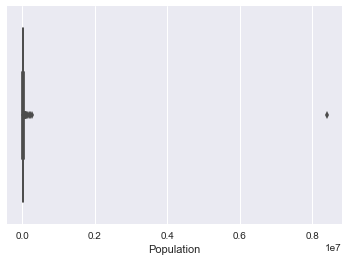

In [127]:
import seaborn as sns
sns.boxplot(crime.Population)

In [128]:
print(crime['City'].ix[crime.Population.argmax()],
      crime['Population'].ix[crime.Population.argmax()])

New York 8396126


In [129]:
#Its a massive outlier but its right, soooooo, just leave it alone I guess?

crime['Population^2'] = crime['Population']*crime['Population']

In [130]:
crime

,City,Population,Murder,Robbery,Population^2
0,Adams Village,1861,0,0,3463321
1,Addison Town and Village,2577,0,0,6640929
2,Akron Village,2846,0,0,8099716
3,Albany,97956,1,1,1005443344
4,Albion Village,6388,0,1,40806544
5,Alfred Village,4089,0,1,16719921
6,Allegany Village,1781,0,0,3171961
7,Amherst Town,118296,1,1,1109041728
8,Amityville Village,9519,0,1,90611361
9,Amsterdam,18182,0,1,330585124
